### **Syahdan Naufal N.I**
### **IF-44-01**
### **1301204110**

# **CASE BASE 1 - ML**



**Import Library**




---



In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.neural_network import MLPClassifier
import numpy as np


In [ ]:
#Menampilkan seluruh data arrhythnia.csv 
data = pd.read_csv("data_arrhythmia.csv",sep=";", na_values="?")
data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


**PRE-PROCESSING**

---



In [ ]:
data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,12,15,16,17,-1]]
data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,QRST,q_wave,r_wave,s_wave,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,-2.0,0,52,44,8
1,56,1,165,64,81,174,401,149,39,25,31.0,0,48,0,6
2,54,0,172,95,138,163,386,185,102,96,66.0,0,40,80,10
3,55,0,175,94,100,202,380,179,143,28,20.0,0,72,20,1
4,75,0,190,80,88,181,360,177,103,-16,3.0,0,48,40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,-27.0,0,52,24,1
448,37,0,190,85,100,137,361,201,73,86,79.0,0,44,36,10
449,36,0,166,68,108,176,365,194,116,-85,-70.0,16,40,40,2
450,32,1,155,55,93,106,386,218,63,54,43.0,0,56,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           452 non-null    int64  
 1   sex           452 non-null    int64  
 2   height        452 non-null    int64  
 3   weight        452 non-null    int64  
 4   qrs_duration  452 non-null    int64  
 5   p-r_interval  452 non-null    int64  
 6   q-t_interval  452 non-null    int64  
 7   t_interval    452 non-null    int64  
 8   p_interval    452 non-null    int64  
 9   qrs           452 non-null    int64  
 10  QRST          451 non-null    float64
 11  q_wave        452 non-null    int64  
 12  r_wave        452 non-null    int64  
 13  s_wave        452 non-null    int64  
 14  diagnosis     452 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 53.1 KB


In [ ]:
#Melihat seberapa banyak missing values
data.isna().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
QRST            1
q_wave          0
r_wave          0
s_wave          0
diagnosis       0
dtype: int64

In [ ]:
# melihat data mean untuk nantinya di isi ke data yang kosong 
data.mean()

age              46.471239
sex               0.550885
height          166.188053
weight           68.170354
qrs_duration     88.920354
p-r_interval    155.152655
q-t_interval    367.207965
t_interval      169.949115
p_interval       90.004425
qrs              33.676991
QRST             36.716186
q_wave            5.628319
r_wave           51.628319
s_wave           20.920354
diagnosis         3.880531
dtype: float64

In [ ]:
data['QRST'] = data['QRST'].fillna(37)
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
QRST            0
q_wave          0
r_wave          0
s_wave          0
diagnosis       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error

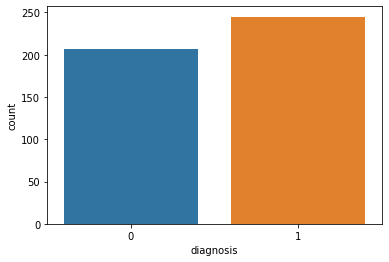

In [ ]:
# Melakukan klasifikasi biner 
list_of_class = []
for i in data.iloc:
  if i["diagnosis"] == 1:
    list_of_class.append(1)
  else:
    list_of_class.append(0)

data.drop(columns="diagnosis", inplace = True)
data['diagnosis'] = np.array(list_of_class)
sns.countplot(data['diagnosis'], label = "Count")

KORELASI

---



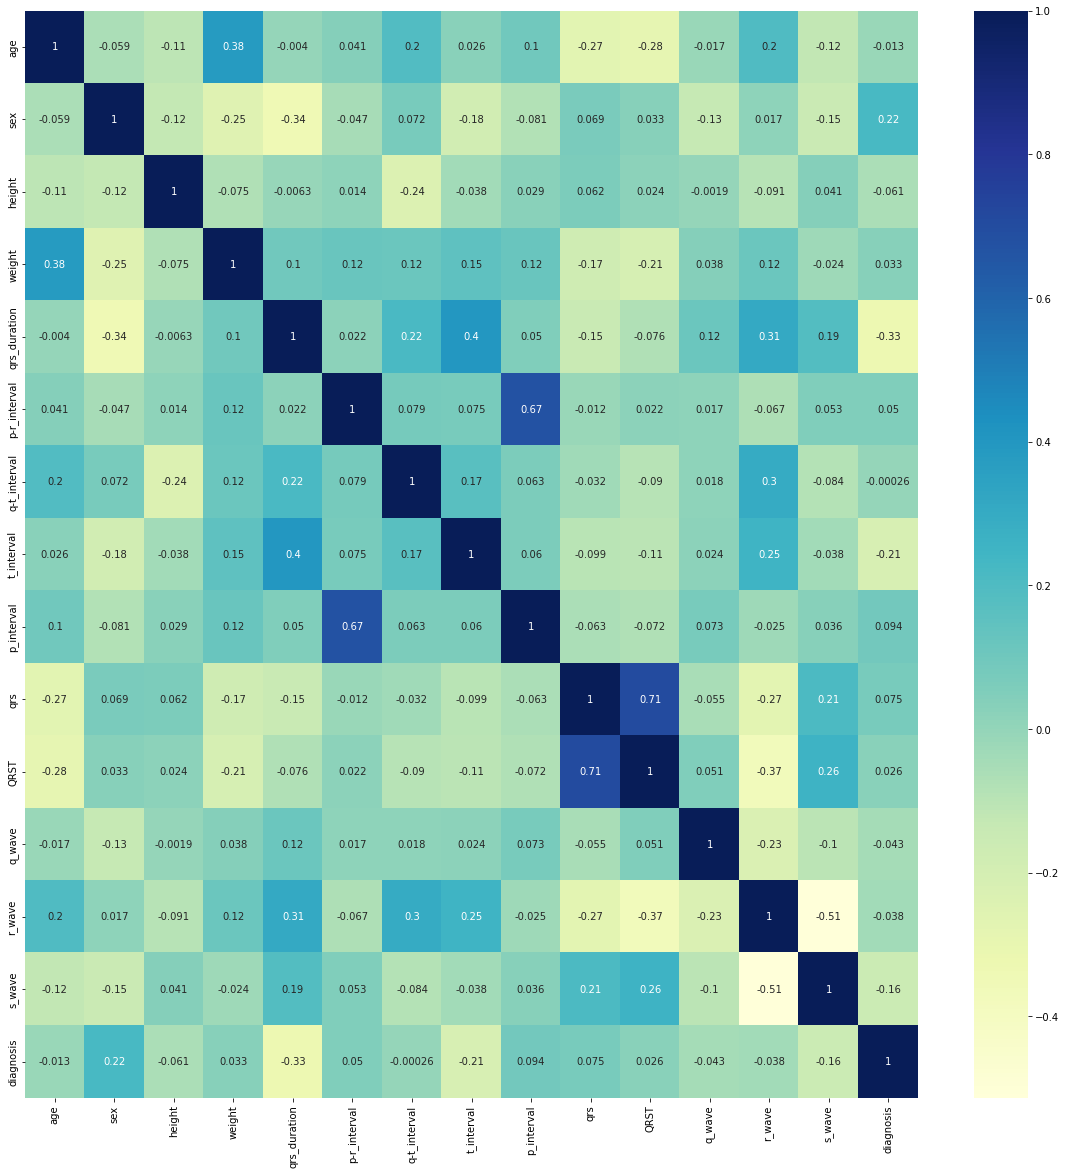

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")



**Split database**


---



In [ ]:
#extracting x and y
x = data.drop(["diagnosis"], axis=1).values

y = data["diagnosis"].values
 


In [ ]:
   #Proses Split data

# x = data[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','P_interval','QRST','q_wave','r_wave','s_wave','diagnosis']]
# y = data[['diagnosis']]

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=3, shuffle=True)


# Modelling  


In [ ]:
#Pembuatan model dengan MLP classification
clasf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                    max_iter=300,
                    solver = 'lbfgs',
                    verbose = True,
                    random_state=5)

clasf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=5,
              solver='lbfgs', verbose=True)

In [ ]:
# Make prediction on test dataset
y_predic = clasf.predict(x_test)
y_train_pred = clasf.predict(x_train) 
print("Hasil Prediksi : ")
print(y_predic)

#Calculate accuracy with accuracy library 
hasil = accuracy_score(y_predic,y_test)
print(f"Hasil akurasi testing: {hasil * 100}")

hasil_train = accuracy_score(y_train_pred,y_train)
print(f"Hasil Akurasi train: {hasil_train} ")


persen = hasil * 100
persen_train = hasil_train * 100
print("Hasil Testing = ",round(persen,2),"%")
print("Hasil Training = ",round(persen_train,2),"%")


Hasil Prediksi : 
[0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1]
Hasil akurasi testing: 65.93406593406593
Hasil Akurasi train: 0.8975069252077562 
Hasil Testing =  65.93 %
Hasil Training =  89.75 %
